In [89]:
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
from src.etl import *
from sklearn.model_selection import train_test_split
import shap

In [3]:
prosperity_data = get_prosperity_scores()
prosperity_data.head()

,country,isonum,isocode,year,busi,econ,educ,envi,gove,heal,pers,safe,soci,prosperity
0,Afghanistan,4,AFG,2007,35.308167,53.251713,22.494400,39.293343,29.760307,51.600807,32.290104,37.240280,37.691658,37.658975
1,Angola,24,AGO,2007,27.057371,51.743580,35.916668,47.982162,30.910105,57.914005,45.123459,53.325123,44.954544,43.880780
2,Albania,8,ALB,2007,40.626377,57.979511,56.318413,51.049442,42.531654,74.527748,60.275913,68.989883,41.740612,54.893284
3,United Arab Emirates,784,ARE,2007,52.791740,67.167816,59.942955,62.051479,48.831993,77.575127,49.087570,80.370224,52.181824,61.111192
4,Argentina,32,ARG,2007,47.438419,62.476505,51.995552,64.909729,45.032742,74.439102,63.805622,68.519714,48.400772,58.557573


In [27]:
pillar_train, pillar_test = read_in_pillars()
pillar_train = remove_null_columns(pillar_train)
pillar_test = remove_null_columns(pillar_test)

In [28]:
def remove_null_columns(data):
    return {key: data[key].loc[:, ~(data[key].loc[0].apply(lambda x: '***' in str(x)))] for key in data}

In [56]:
pillar_train['soci']

,Unnamed: 0,country,isonum,isocode,year,rank_soci,soci,strange_year,polic_year,respect_year,friends_year,voice_year,vtf,vtf_year,finhelp_year,volunt_year,help_year,donate_year
0,0,Afghanistan,4,AFG,2007,144,37.691658,2008,2008,2008,2010,2008,22.216499,2007,2011,2008,2008,2008
1,1,Angola,24,AGO,2007,107,44.954544,2011,2011,2011,2011,2012,0.000000,2007,2012,2011,2011,2011
2,2,Albania,8,ALB,2007,124,41.740612,2009,2009,2009,2012,2012,46.293499,2007,2012,2009,2009,2009
3,3,United Arab Emirates,784,ARE,2007,51,52.181824,2009,--,2009,2010,2010,0.000000,2007,2012,2009,2009,2009
4,4,Argentina,32,ARG,2007,78,48.400772,2007,2007,2007,2010,2007,65.816994,2007,2012,2007,2007,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1187,Vietnam,704,VNM,2014,73,49.223934,2014,2013,2014,2014,2013,14.926501,2014,2014,2014,2014,2014
1188,1188,Yemen,887,YEM,2014,149,34.863636,2014,2014,2014,2014,2013,0.000000,2014,2014,2014,2014,2014
1189,1189,South Africa,710,ZAF,2014,30,57.354820,2014,2014,2014,2014,2013,69.806000,2014,2014,2014,2014,2014
1190,1190,Zambia,894,ZMB,2014,66,50.936478,2014,2014,2014,2014,2013,45.602501,2014,2014,2014,2014,2014


In [84]:
def get_train_test(pillar, random_state=42, test_size=0.3):
#     random_state = 42
    filt_data = pillar_train[pillar].loc[:, ~((pillar_train[pillar].columns.str.contains('year')) | (pillar_train[pillar].columns == pillar))]
    X = filt_data[filt_data.columns[5:]]
    y = pillar_train[pillar][pillar]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [85]:
def elastic(X_train, y_train, X_test, y_test):
    en = ElasticNet()
    en.fit(X_train, y_train)
    
    score = en.score(X_test, y_test)
    print(f'Model score is {score} on test data')
    
    # consider adding y_pred here
    
    
    return score, en

In [86]:
def get_SHAP_viz(model, X_train, X_test):
    """
    Returns bar plot of each categories impact on pillar score
    ----
    
    Used in get_impt_cat()
    """
    # ***use X_test or X_train?
    explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
    shap_values = explainer.shap_values(X_test)
    
    shap.summary_plot(shap_values, X_test, plot_type="bar")

busi
Model score is 0.9471879249807428 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


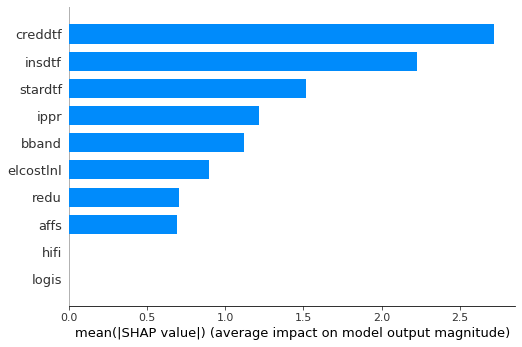

econ
Model score is 0.9539045280875225 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


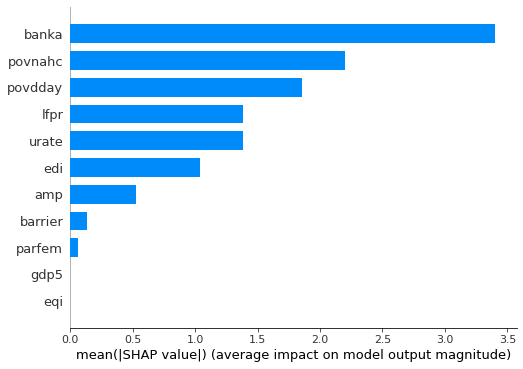

educ
Model score is 0.9714839254394326 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


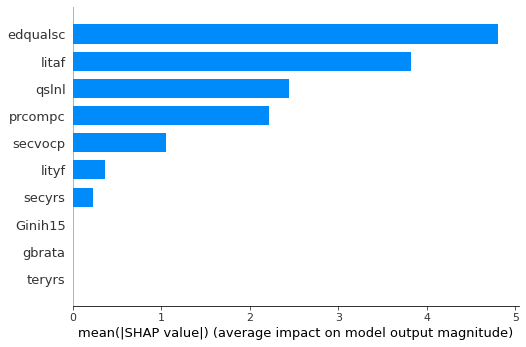

envi
Model score is 0.8693464130267645 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


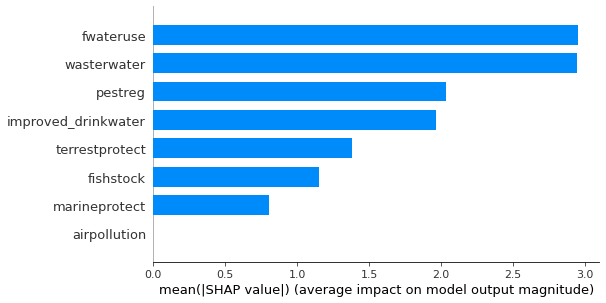

gove
Model score is 0.9720634493145955 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


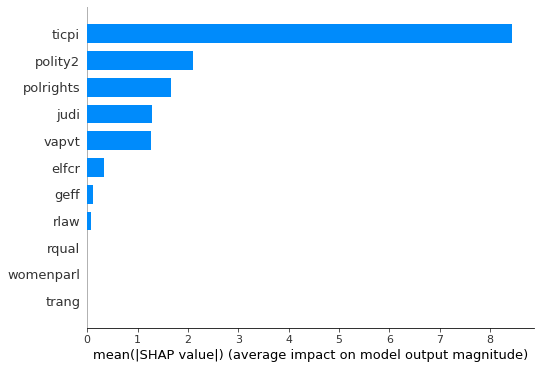

heal
Model score is 0.9582055194988243 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


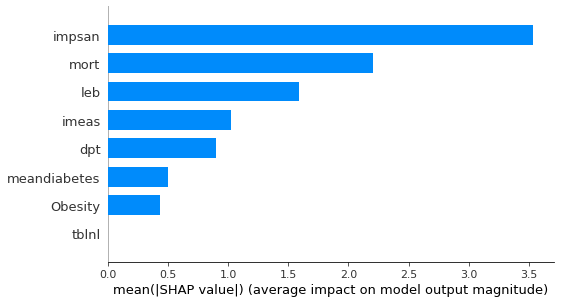

pers
Model score is 0.8898175490493122 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


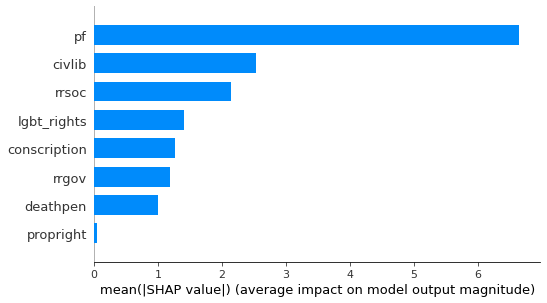

safe
Model score is 0.8733002709123954 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


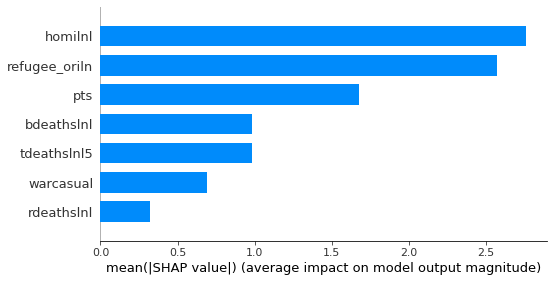

soci
Model score is 0.20461406724402587 on test data


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


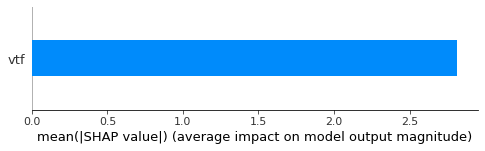

In [88]:
pillars = ['busi', 'econ', 'educ', 'envi','gove', 'heal', 'pers', 'safe', 'soci']

for pillar in pillars:
    X_train, X_test, y_train, y_test = get_train_test(pillar)
    print(pillar)
    score, en = elastic(X_train, y_train, X_test, y_test)
    get_SHAP_viz(en, X_train, X_test)

In [78]:
# class ProsperityExplainer:
    
#     def __init__(self):
#         self.prosperity_scores = 

In [74]:
en.score(X_test, y_test)

0.9465802996646316